<a href="https://colab.research.google.com/github/caiussouza/Controls-Data-Analysis/blob/main/Exemplo_de_an%C3%A1lise_do_IMU_do_celular.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exemplo de análise baseada num teste aleatório do acelerômetro de um celular
## Os arquivos contendo dados (datasets) devem ser carregados no repositório no GitHub: https://github.com/caiussouza/Controls-Data-Analysis

Inclusão das bibliotecas para análise de dados


*   **pandas** - operações com dataframes
*   **matplotlib** - visualização gráfica dos dados



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

Inclusão do dataset a partir do repositório no Github

* Entre no repositório

https://github.com/caiussouza/Controls-Data-Analysis
* Clique no arquivo a ser lido. No exemplo, é o "primeira_analise.csv"
* Clique em "Raw" e copie a url. No exemplo, é

https://raw.githubusercontent.com/caiussouza/Controls-Data-Analysis/main/primeira_analise.csv
* Utilize o método .read_csv('INSIRA URL')




In [ ]:
url_dataframe = 'https://raw.githubusercontent.com/caiussouza/Controls-Data-Analysis/main/primeira_analise.csv'
teste = pd.read_csv(url_dataframe)

Visualizando o resumo do dataset

Exemplos:

*   **teste.info()** - exibe informações sobre o dataframe, incluindo o número de linhas e colunas, nomes e tipos de dados das colunas e o uso de memória.
*   **teste.head()** - exibe as 5 primeiras linhas
*   **teste.describe()** - exibe informações estatísticas sobre o dataframe, como médias, desvios padrões



In [ ]:
teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21315 entries, 0 to 21314
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    21315 non-null  float64
 1   gFx     21315 non-null  float64
 2   gFy     21315 non-null  float64
 3   gFz     21315 non-null  float64
 4   TgF     21315 non-null  float64
dtypes: float64(5)
memory usage: 832.7 KB


In [ ]:
teste.head()

,time,gFx,gFy,gFz,TgF
0,1.705532,0.0034,0.0112,1.0257,1.026
1,1.708314,0.0029,0.0117,1.0264,1.026
2,1.710482,0.0034,0.0107,1.0232,1.023
3,1.712854,0.0056,0.0122,1.0217,1.022
4,1.714592,0.0032,0.0120,1.0210,1.021


In [ ]:
teste.describe()

,time,gFx,gFy,gFz,TgF
count,21315.000000,21315.000000,21315.000000,21315.00000,21315.000000
mean,23.004232,0.209873,0.338987,0.51574,1.019970
std,12.303106,0.451904,0.421310,0.51733,0.184212
min,1.705532,-5.877500,-5.027100,-5.84550,0.075000
25%,12.349646,-0.022500,0.015900,0.02390,0.997000
50%,23.008690,0.000500,0.169600,0.52530,1.004000
75%,33.656736,0.360300,0.795400,1.01760,1.025000
max,44.311132,8.009500,5.122400,7.58750,10.075000


Adiciona o "time" como índice do dataframe e transforma para um formato Tempo que pode ser processado e "resampleado"

In [ ]:
time_offset = pd.Timestamp('00:00:00')

In [ ]:
teste_time = teste.time

In [ ]:
teste_time = time_offset + pd.to_timedelta(teste['time'], unit='s')
teste.time = teste_time

In [ ]:
teste_resampled = teste.set_index('time')



In [ ]:
teste_resampled = teste_resampled.resample('100ms').mean()

Os dados são fornecidos em "g". Aqui, há a conversão para m/s²

In [ ]:
g = 9.8
teste_resampled_in_g = teste_resampled
teste_resampled_in_g[['gFx', 'gFy', 'gFz']] = teste_resampled_in_g[['gFx', 'gFy', 'gFz']] * g

Aqui há o plot conjunto dos três valores do acelerômetro. Abaixo, uma visão separada

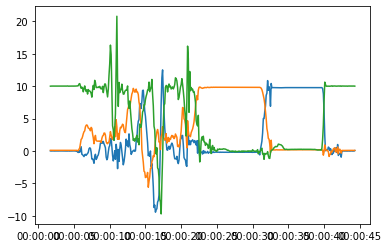

In [ ]:
x = teste_resampled_in_g.index
y_in_x = teste_resampled_in_g.gFx
y_in_y = teste_resampled_in_g.gFy
y_in_z = teste_resampled_in_g.gFz
plt.plot(x, y_in_x)
plt.plot(x, y_in_y)
plt.plot(x, y_in_z)

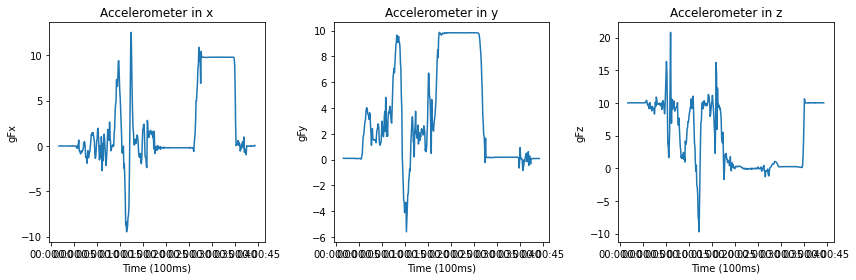

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
axs[0].plot(x, y_in_x)
axs[0].set_title('Accelerometer in x')
axs[0].set_xlabel('Time (100ms)')
axs[0].set_ylabel('gFx')
axs[1].plot(x, y_in_y)
axs[1].set_title('Accelerometer in y')
axs[1].set_xlabel('Time (100ms)')
axs[1].set_ylabel('gFy')
axs[2].plot(x, y_in_z)
axs[2].set_title('Accelerometer in z')
axs[2].set_xlabel('Time (100ms)')
axs[2].set_ylabel('gFz')
fig.tight_layout()